# QCP user guide
This notebook goes through the steps for opening and displaying quasiperiodic patterns from images of polygonal quasicrystals. The example will be shown using the dodecagonal BaTiO3 quasicrystal STM image. 

### Packages and initialization

Here the required packages are imported and the class instance is initialized with the image to be analyzed.

In [ ]:
import matplotlib.pyplot as plt
# The QCP.py file has to be in the same folder or use pathing:
# import sys
# sys.path.append("<relative path to qcp>")
import QCP
import numpy as np
import cv2 as cv

# the .ini file should be found in the same folder as the image.
path = "./examples/quasicrystalline_pattern_recognition/Ba-Ti-O_Pt(111)/"
filename = "Ba-Ti-O_Pt(111).png"

#initialize class instance
qcp = QCP.QCP(path=path, filename=filename)

(-0.5, 2105.5, 2105.5, -0.5)

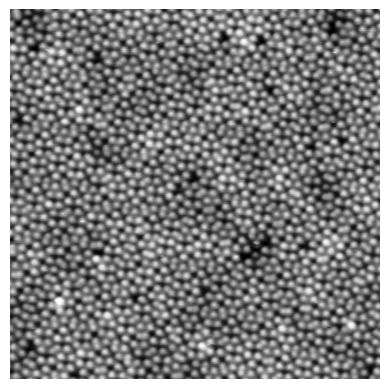

In [ ]:
#show the original image
fig, ax = plt.subplots()
ax.imshow(qcp.gray, cmap="Greys_r")
ax.axis('off')

#save figure by removing the # in the next line
# fig.savefig(path+"figurename.svg")

### Find atomic keypoints

(The following section is a breakdown of the individual steps to allow customization and show intermittent results. For faster first results one can just use `qcp.compute()`)

In [3]:
qcp.calculate_filtered_keypoints()
qcp.calculate_kp_clusters()
qcp.get_informative_label_neighbours()

(-0.5, 2105.5, 2105.5, -0.5)

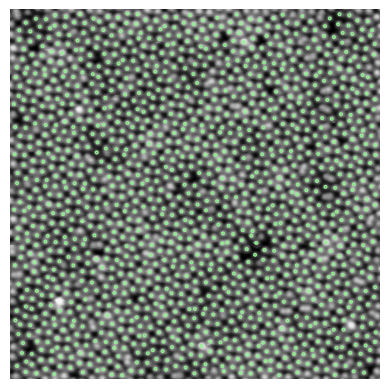

In [ ]:
fig, ax = plt.subplots()
qcp.plot_relevant_keypoints(ax)
ax.axis('off')

#save figure by removing the # in the next line
fig.savefig(path+"detected_kps.svg")

### Calculate the symmetry vectors and train the classifier

In [5]:
qcp.get_classifier()
qcp.center_locations()
qcp.calculate_dominant_distance_vectors()

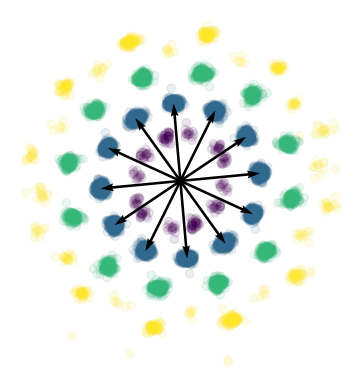

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.axis('off')
qcp.plot_vectors(ax)

#save figure by removing the # in the next line
fig.savefig(path+"NN_cluster.svg")

### Contour tile outlines

In [7]:
qcp.set_contours()
qcp.match_keypoints_to_contours()

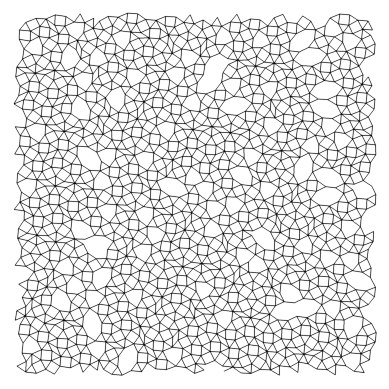

In [ ]:
fig, ax = plt.subplots()
ax.axis('off')
img=np.zeros_like(qcp.gray)
cv.drawContours(img, qcp.contours, -1, (255,255,255), 3)
ax.imshow(img, cmap='Greys')
#save figure by removing the # in the next line
fig.savefig(path+"contours.svg")

### Extract individual tiles

In [9]:
qcp.get_tile_angles()
qcp.cluster_shapes()
qcp.get_average_angles()
qcp.fill_tiles()

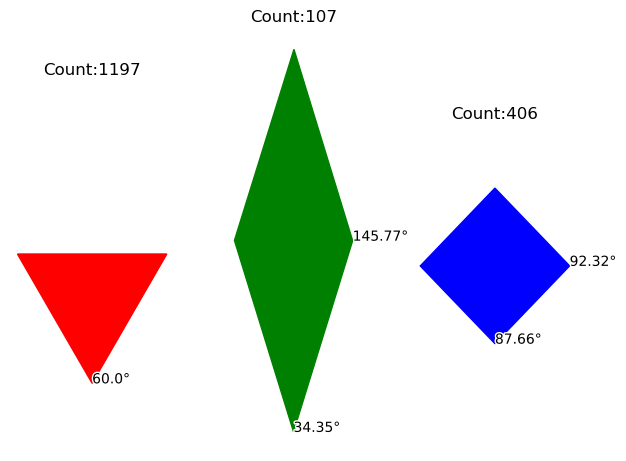

In [ ]:
qcp.compute_tile_point_locations(show_plot=True)
#save figure by removing the # in the next line
fig.savefig(path+"tiles.svg")

### plot initial tiling result

(-0.5, 2105.5, 2105.5, -0.5)

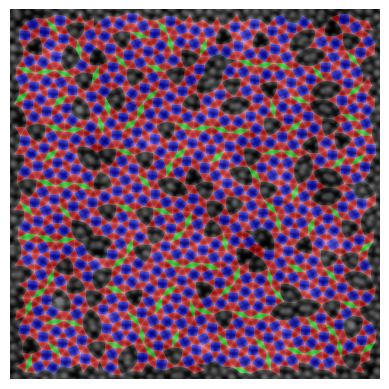

In [ ]:
fig,ax=plt.subplots()
qcp.plot_all_tiles(ax=ax)
ax.axis('off')
#save figure by removing the # in the next line
fig.savefig(path+"initial_tiling.svg")

### Find missing points

One run of finding, filling and computing consits of the following class methods:

- `qcp.find_missing_points()`
- `qcp.fill_missing_points()`
- `qcp.compute(refilled=True)`



In [12]:
# this method runs the missing point search iteratively until either no more missing points are found 
# or the upper bound of runs (10 in this case) is reached
qcp.fill_and_compute(runs=10) 


No more candidates after 1 runs.


### plot final tiling result

(-0.5, 2105.5, 2105.5, -0.5)

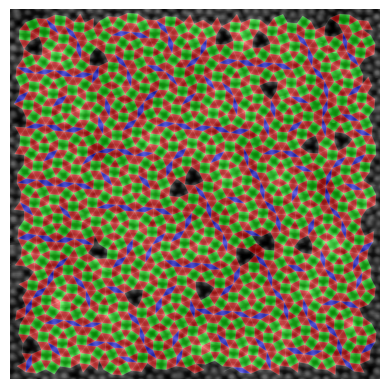

In [ ]:
fig,ax=plt.subplots()
qcp.plot_all_tiles(ax=ax)
ax.axis('off')

#save figure by removing the # in the next line
fig.savefig(path+"final_tiling.svg")